In [43]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from IPython.display import Image

import seaborn as sns
import matplotlib.pylab as plt

plt.rc('font', family='malgun gothic')
plt.rc('axes', unicode_minus=False)

In [44]:
# 데이터 불러오기
df = pd.read_csv('방송통신위원회_OTT 서비스 이용 시 즐겨보는 장르_20220711.csv', encoding='euc-kr')
df.head()

,연번,조사연도,국가,분류,구분,사례수(명),드라마(비율),버라이어티쇼(비율),음악(비율),뉴스시사보도(비율),...,코미디(비율),문화예술(비율),퀴즈쇼게임쇼(비율),토크쇼(비율),키즈(비율),리얼리티쇼(비율),종교(비율),생활(비율),시리즈물(비율),기타(비율)
0,1,2019,인도,국가별,전체,322,9.6,2.5,9.3,9.9,...,10.6,0.0,0.0,2.2,1.2,8.4,0.3,0.0,0.0,0.3
1,2,2019,터키,국가별,전체,321,4.4,3.1,2.8,7.8,...,9.0,0.0,2.5,1.2,5.9,4.0,0.6,0.0,0.9,0.6
2,3,2019,캐나다,국가별,전체,281,15.3,2.5,3.6,6.8,...,19.2,0.0,0.0,2.8,3.2,5.0,0.7,0.0,0.4,0.4
3,4,2019,헝가리,국가별,전체,223,5.4,0.9,9.0,2.2,...,14.3,0.0,0.0,1.8,0.9,4.0,0.0,0.0,3.1,1.3
4,5,2019,인도,성별,남성,159,7.5,3.1,10.7,10.1,...,10.1,0.0,0.0,2.5,1.9,4.4,0.0,0.0,0.0,0.6


In [45]:
# 각 국가별로 데이터를 필터링하여 새로운 데이터프레임 생성
brazil = df.query("국가=='브라질'").reset_index(drop=True)
uae = df.query("국가=='UAE'").reset_index(drop=True)
india = df.query("국가=='인도'").reset_index(drop=True)
turkiye = df.query("국가=='터키'").reset_index(drop=True)
uk = df.query("국가=='영국'").reset_index(drop=True)
canada = df.query("국가=='캐나다'").reset_index(drop=True)

brazil.head()

,연번,조사연도,국가,분류,구분,사례수(명),드라마(비율),버라이어티쇼(비율),음악(비율),뉴스시사보도(비율),...,코미디(비율),문화예술(비율),퀴즈쇼게임쇼(비율),토크쇼(비율),키즈(비율),리얼리티쇼(비율),종교(비율),생활(비율),시리즈물(비율),기타(비율)
0,107,2020,브라질,국가별,전체,368,4.3,1.4,5.7,6.3,...,7.3,1.1,1.1,0.8,3.5,1.9,1.6,0.0,0.0,0.0
1,115,2020,브라질,성별,남성,185,3.2,0.5,5.9,7.0,...,8.1,1.6,1.1,0.5,1.6,1.6,0.5,0.0,0.0,0.0
2,116,2020,브라질,성별,여성,183,5.5,2.2,5.5,5.5,...,6.6,0.5,1.1,1.1,5.5,2.2,2.7,0.0,0.0,0.0
3,134,2020,브라질,연령별,10대,48,4.2,0.0,4.2,0.0,...,14.6,6.3,4.2,2.1,4.2,4.2,0.0,0.0,0.0,0.0
4,135,2020,브라질,연령별,20대,65,10.8,1.5,9.2,4.6,...,7.7,1.5,1.5,1.5,1.5,4.6,1.5,0.0,0.0,0.0


In [46]:
# 사용하지 않는 column 삭제
brazil= brazil.drop(['연번','조사연도','국가','사례수(명)'], axis=1)
uae = uae.drop(['연번','조사연도','국가','사례수(명)'], axis=1)
india = india.drop(['연번','조사연도','국가','사례수(명)'], axis=1)
turkiye = turkiye.drop(['연번','조사연도','국가','사례수(명)'], axis=1)
uk = uk.drop(['연번','조사연도','국가','사례수(명)'], axis=1)
canada = canada.drop(['연번','조사연도','국가','사례수(명)'], axis=1)

brazil.head()

,분류,구분,드라마(비율),버라이어티쇼(비율),음악(비율),뉴스시사보도(비율),교육(비율),영화(비율),스포츠(비율),다큐멘터리(비율),...,코미디(비율),문화예술(비율),퀴즈쇼게임쇼(비율),토크쇼(비율),키즈(비율),리얼리티쇼(비율),종교(비율),생활(비율),시리즈물(비율),기타(비율)
0,국가별,전체,4.3,1.4,5.7,6.3,1.9,39.9,11.1,6.5,...,7.3,1.1,1.1,0.8,3.5,1.9,1.6,0.0,0.0,0.0
1,성별,남성,3.2,0.5,5.9,7.0,2.2,32.4,19.5,7.0,...,8.1,1.6,1.1,0.5,1.6,1.6,0.5,0.0,0.0,0.0
2,성별,여성,5.5,2.2,5.5,5.5,1.6,47.5,2.7,6.0,...,6.6,0.5,1.1,1.1,5.5,2.2,2.7,0.0,0.0,0.0
3,연령별,10대,4.2,0.0,4.2,0.0,2.1,37.5,8.3,0.0,...,14.6,6.3,4.2,2.1,4.2,4.2,0.0,0.0,0.0,0.0
4,연령별,20대,10.8,1.5,9.2,4.6,1.5,29.2,7.7,6.2,...,7.7,1.5,1.5,1.5,1.5,4.6,1.5,0.0,0.0,0.0


In [47]:
# '국가별' 분류에 해당하는 데이터만 필터링하여 새로운 데이터프레임 생성
brazil_n = brazil.query("분류=='국가별'").reset_index(drop=True)
uae_n = uae.query("분류=='국가별'").reset_index(drop=True)
india_n = india.query("분류=='국가별'").reset_index(drop=True)
turkiye_n = turkiye.query("분류=='국가별'").reset_index(drop=True)
uk_n = uk.query("분류=='국가별'").reset_index(drop=True)
canada_n = canada.query("분류=='국가별'").reset_index(drop=True)

brazil_n

,분류,구분,드라마(비율),버라이어티쇼(비율),음악(비율),뉴스시사보도(비율),교육(비율),영화(비율),스포츠(비율),다큐멘터리(비율),...,코미디(비율),문화예술(비율),퀴즈쇼게임쇼(비율),토크쇼(비율),키즈(비율),리얼리티쇼(비율),종교(비율),생활(비율),시리즈물(비율),기타(비율)
0,국가별,전체,4.3,1.4,5.7,6.3,1.9,39.9,11.1,6.5,...,7.3,1.1,1.1,0.8,3.5,1.9,1.6,0.0,0.0,0.0


In [48]:
# 분석하기 좋은 형태로 변환
brazil_n = brazil_n.melt(id_vars=['분류','구분'])
brazil_n.columns=['분류','구분','장르','비율']

uae_n = uae_n.melt(id_vars=['분류','구분'])
uae_n.columns=['분류','구분','장르','비율']

india_n = india_n.melt(id_vars=['분류','구분'])
india_n.columns=['분류','구분','장르','비율']

turkiye_n = turkiye_n.melt(id_vars=['분류','구분'])
turkiye_n.columns=['분류','구분','장르','비율']

uk_n = uk_n.melt(id_vars=['분류','구분'])
uk_n.columns=['분류','구분','장르','비율']

canada_n = canada_n.melt(id_vars=['분류','구분'])
canada_n.columns=['분류','구분','장르','비율']

brazil_n.head()

,분류,구분,장르,비율
0,국가별,전체,드라마(비율),4.3
1,국가별,전체,버라이어티쇼(비율),1.4
2,국가별,전체,음악(비율),5.7
3,국가별,전체,뉴스시사보도(비율),6.3
4,국가별,전체,교육(비율),1.9


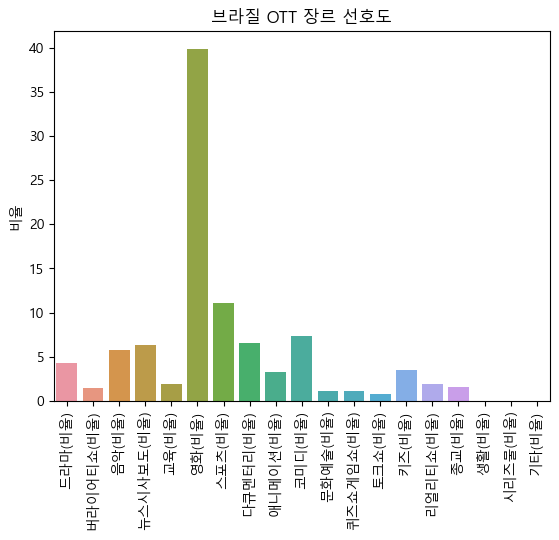

In [49]:
#브라질 OTT 장르 선호도 (전체)
sns.barplot(x=brazil_n['장르'], y=brazil_n['비율'])
plt.xticks(rotation=90)
plt.title('브라질 OTT 장르 선호도')
plt.xlabel('')
plt.show()

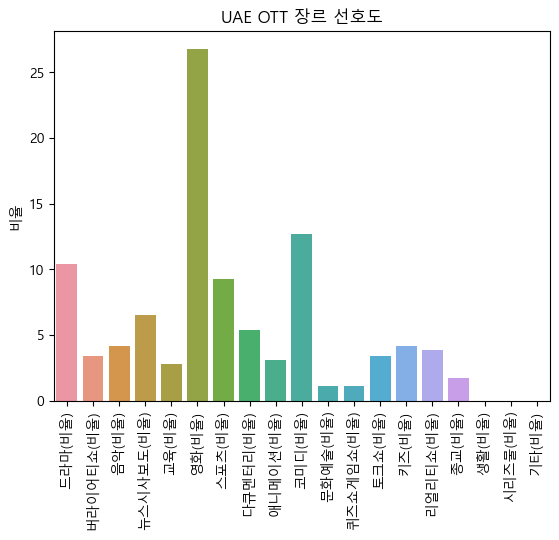

In [50]:
#UAE OTT 장르 선호도 (전체)
sns.barplot(x=uae_n['장르'], y=uae_n['비율'])
plt.xticks(rotation=90)
plt.title('UAE OTT 장르 선호도')
plt.xlabel('')
plt.show()

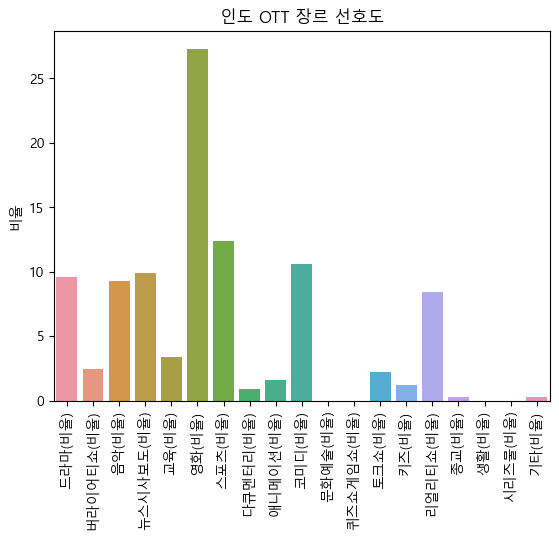

In [51]:
#인도 OTT 장르 선호도 (전체)
sns.barplot(x=india_n['장르'], y=india_n['비율'])
plt.xticks(rotation=90)
plt.title('인도 OTT 장르 선호도')
plt.xlabel('')
plt.show()

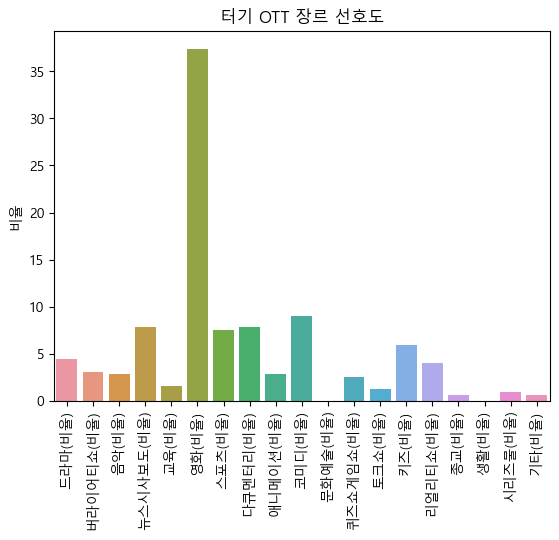

In [52]:
#터키 OTT 장르 선호도 (전체)
sns.barplot(x=turkiye_n['장르'], y=turkiye_n['비율'])
plt.xticks(rotation=90)
plt.title('터기 OTT 장르 선호도')
plt.xlabel('')
plt.show()

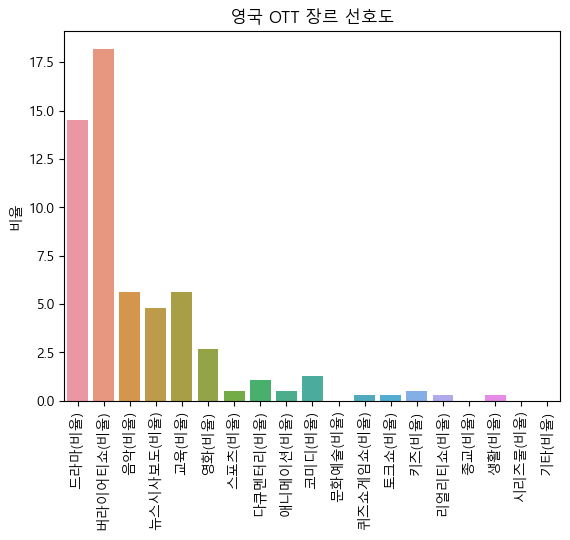

In [53]:
#영국 OTT 장르 선호도 (전체)
sns.barplot(x=uk_n['장르'], y=uk_n['비율'])
plt.xticks(rotation=90)
plt.title('영국 OTT 장르 선호도')
plt.xlabel('')
plt.show()

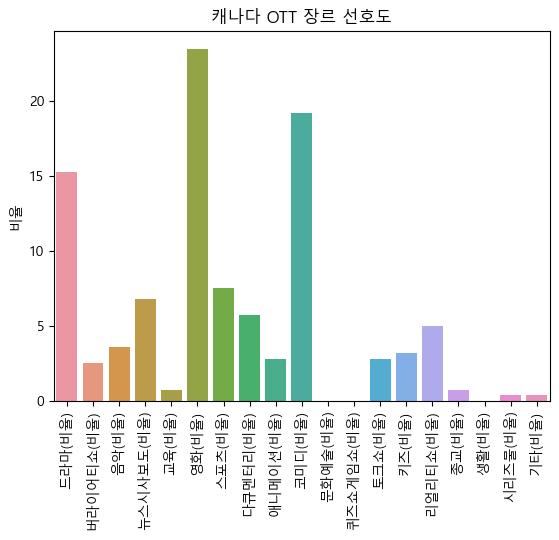

In [54]:
#캐나다 OTT 장르 선호도 (전체)
sns.barplot(x=canada_n['장르'], y=canada_n['비율'])
plt.xticks(rotation=90)
plt.title('캐나다 OTT 장르 선호도')
plt.xlabel('')
plt.show()